In [1]:
from indicnlp.tokenize.indic_tokenize import trivial_tokenize
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory

In [2]:
import codecs
import string
import re
from tqdm.notebook import tqdm
import pandas as pd

In [3]:
import re
from operator import itemgetter
import matplotlib.pyplot as plt
from scipy import special
import numpy as np

In [4]:
import pickle
import os
import sys

In [5]:
lang = 'hi'                   # language code chosen
input_path = 'hi.txt'         # Input file name
output_path = 'hi.tok.txt'    # Preprocessed input file name

normalizer_factory = IndicNormalizerFactory()
normalizer = normalizer_factory.get_normalizer(lang)

In [6]:
def clean_text(sentence):
    exclude = set(string.punctuation)
    remove_digits = str.maketrans('', '', string.digits)
    sentence = sentence.lower()                          # Lower case conversion
    sentence = ''.join(ch for ch in sentence if ch not in exclude)
    sent_temp = ''
    for c in sentence:
        if c == ' ':
            sent_temp += c
        elif ord(u'\u0900') <= ord(c) <= ord(u'\u097F'): # Hindi unicode range, scrubs remaining characters
            sent_temp += c
    sentence = sent_temp
    sentence = re.sub('[a-z]', '', sentence)             # removes english alphabets if present
    sentence = sentence.translate(remove_digits)         # Removes digits
    sentence = sentence.strip()
    sentence = re.sub(" +", " ", sentence)               # Removes unnecessary spaces
    return sentence

In [7]:
def process_sent(sent):
    normalized = normalizer.normalize(sent)                    # Normalizer for devanagri script
    processed = ' '.join(trivial_tokenize(normalized, lang))   # Tokenizer
    processed = clean_text(processed)                          # preprocess the sentence
    return processed

## Preprocess

In [6]:
# Reads corpus and preprocess it and save into another file
count = 0
with open(input_path, 'r', encoding='utf-8') as in_fp,open(output_path, 'w', encoding='utf-8') as out_fp:
    for line in tqdm(in_fp.readlines()):
        sent = line.rstrip('\n')
        toksent = process_sent(sent)
        out_fp.write(toksent)
        out_fp.write('\n')
        count += 1

  0%|          | 0/63057912 [00:00<?, ?it/s]

In [6]:
# Outputs no of lines in our corpus
with open(input_path, 'r', encoding='utf-8') as ofp:
    print(len(ofp.readlines()))
    ofp.close()

63057912


In [8]:
composite_letters = {'क्ष':[],'त्र':[],'ज्ञ':[],'द्व':[],'त्क':[],'श्र':[],'द्य':[],'द्द':[],'त्त':[],'ध्द':[],'द्भ':[],'द्म':[],'ह्य':[]}

In [9]:
# Generating composite words split
for i in composite_letters.keys():
    chars = []
    for j in i:
        chars.append(j)
    composite_letters[i] = chars

In [10]:
composite_letters

{'क्ष': ['क', '्', 'ष'],
 'त्र': ['त', '्', 'र'],
 'ज्ञ': ['ज', '्', 'ञ'],
 'द्व': ['द', '्', 'व'],
 'त्क': ['त', '्', 'क'],
 'श्र': ['श', '्', 'र'],
 'द्य': ['द', '्', 'य'],
 'द्द': ['द', '्', 'द'],
 'त्त': ['त', '्', 'त'],
 'ध्द': ['ध', '्', 'द'],
 'द्भ': ['द', '्', 'भ'],
 'द्म': ['द', '्', 'म'],
 'ह्य': ['ह', '्', 'य']}

In [11]:
consonants=['क', 'ख', 'ग', 'घ', 'ङ',
            'च', 'छ', 'ज', 'झ', 'ञ',
            'ट', 'ठ', 'ड', 'ढ', 'ण', 
            'त', 'थ', 'द', 'ध', 'न', 
            'प', 'फ', 'ब', 'भ', 'म',
            'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह', 'ळ']

In [12]:
matraas = ['ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'ॄ', 'ॅ', 'े', 'ै', 'ॉ', 'ो', 'ौ', '्','ं','ः','़','ॢ']

In [13]:
vowels = ['अ','आ','इ','ई','उ','ऊ','ए','ऐ','ओ','औ','अं','अ:','ऋ']

In [33]:
# Set of characters used in the corpus
char_set = set()
with open(output_path, 'r', encoding='utf-8') as out_fp:
    for line in tqdm(out_fp.readlines()):
        for char in line:
            char_set.add(char)

  0%|          | 0/63057912 [00:00<?, ?it/s]

In [34]:
char_set

{'\n',
 ' ',
 'ऀ',
 'ँ',
 'ं',
 'ः',
 'ऄ',
 'अ',
 'आ',
 'इ',
 'ई',
 'उ',
 'ऊ',
 'ऋ',
 'ऌ',
 'ऍ',
 'ऎ',
 'ए',
 'ऐ',
 'ऑ',
 'ऒ',
 'ओ',
 'औ',
 'क',
 'ख',
 'ग',
 'घ',
 'ङ',
 'च',
 'छ',
 'ज',
 'झ',
 'ञ',
 'ट',
 'ठ',
 'ड',
 'ढ',
 'ण',
 'त',
 'थ',
 'द',
 'ध',
 'न',
 'प',
 'फ',
 'ब',
 'भ',
 'म',
 'य',
 'र',
 'ल',
 'ळ',
 'व',
 'श',
 'ष',
 'स',
 'ह',
 'ऺ',
 'ऻ',
 '़',
 'ऽ',
 'ा',
 'ि',
 'ी',
 'ु',
 'ू',
 'ृ',
 'ॄ',
 'ॅ',
 'ॆ',
 'े',
 'ै',
 'ॉ',
 'ॊ',
 'ो',
 'ौ',
 '्',
 'ॎ',
 'ॏ',
 'ॐ',
 '॑',
 '॒',
 '॓',
 '॔',
 'ॕ',
 'ॖ',
 'ॠ',
 'ॡ',
 'ॢ',
 'ॣ',
 '॥',
 '॰',
 'ॱ',
 'ॳ',
 'ॴ',
 'ॵ',
 'ॶ',
 'ॷ',
 'ॹ',
 'ॺ',
 'ॻ',
 'ॼ',
 'ॽ',
 'ॾ',
 'ॿ'}

### Top 100 unigrams for characters

In [11]:
# word_dict is a dictionary of words in corpus and their respective frequencies
word_dict = {}
with open(output_path, 'r', encoding='utf-8') as out_fp:
    for line in tqdm(out_fp.readlines()):
        for word in line.split():
            if word not in word_dict:
                word_dict[word] = 1
            else:
                word_dict[word] += 1

  0%|          | 0/63057912 [00:00<?, ?it/s]

In [82]:
# saving the file using pickle
dictionary_file = open("word_dict.pkl", "wb")
pickle.dump(word_dict, dictionary_file)
dictionary_file.flush()

In [14]:
# using the saved pickle file
word_dict = pickle.load(open("word_dict.pkl", "rb"))

In [15]:
# Utility functions
# returns a character is whether consonant or not
def isconsonant(char):
    return True if char in consonants else False

# returns a character is whether matraa or not
def ismatraa(char):
    return True if char in matraas else False

# returns a character is whether vowel or not
def isvowel(char):
    return True if char in vowels else False

# updates dictionary by checking conditions
def update_dict(dic,word):
    if word in dic:
        dic[word] += 1
    else:
        dic[word] = 1

# updates local dictionary to global and multiplies values by a factor
def local_to_global_update(local_dict,global_dict,factor):
    for i in local_dict:
        if i in global_dict:
            global_dict[i] += local_dict[i]*factor
        else :
            global_dict[i] = local_dict[i]*factor

In [16]:
# unigram character count
uni_char = {}
for word in word_dict.keys():
    for i in range(len(word)):
        local_dict = {}  # local copy of dictionary
        if isconsonant(word[i]):
            if i<=len(word)-2  and ismatraa(word[i+1]):
                update_dict(local_dict,word[i])
                update_dict(local_dict,word[i+1])
                i += 1
            else:
                update_dict(local_dict,word[i]) 
                update_dict(local_dict,'halanta') # If the letter exists individually, then halanta is inserted
        else:
            update_dict(local_dict,word[i])
        local_to_global_update(local_dict,uni_char,word_dict[word])  # updates to global dictionary
        local_dict.clear()

In [17]:
# Utility function to return top 100 terms of a dictionary
def return_top_100(dic):
    ans_list = []
    for key, value in dic.items():
        temp = [key,value]
        ans_list.append(temp)
    ans_list = sorted(ans_list, key=lambda x: x[1],reverse = True) # reverse sort using frequency
    return ans_list[:100]

In [28]:
with open("unigramwords.txt", "w",encoding='utf-8') as outfile:
    outfile.write("\n".join(str(item[0]) for item in return_top_100(word_dict)))

In [20]:
with open("unigramchar.txt", "w",encoding='utf-8') as outfile:
    outfile.write("\n".join(str(item[0]) for item in return_top_100(uni_char)))

### Top 100 Bi-grams, Tri-grams, Quad-grams

In [21]:
# Returns characters in a word as list after processing
def generate_corrected(word):
    ans = []
    i = 0
    while(i < len(word)):
        if isconsonant(word[i]):
            #if i<=len(word)-3 and word[i+1]=='्' and (word[i]+word[i+1]+word[i+2]) in ['क्ष','त्र','ज्ञ','श्र']:
                #ans.append(word[i]+word[i+1]+word[i+2])
                #i+=2
            #el
            if i<=len(word)-2  and ismatraa(word[i+1]):
                ans.extend([word[i],word[i+1]])
                i+=1
            else:
                ans.extend([word[i],'h']) # Adds halanta for standalone consonants without matraa
        else:
            ans.append(word[i])
        i += 1
    return ans

In [22]:
bi_char = {} # Bi gram character count
tri_char = {} # Tri gram character count
quad_char = {} # Quad gram character count
for word in word_dict.keys():
    corrected_char_list = generate_corrected(word)
    # local copies of dictionary
    bi_local_dict = {}
    tri_local_dict = {}
    quad_local_dict = {}
    for i in range(len(corrected_char_list)):
        # updates bigram, trigram and quadgram character dictionaries simultaneously
        if(i+1 <= len(corrected_char_list)-1):
            update_dict(bi_local_dict,corrected_char_list[i]+corrected_char_list[i+1])
        if(i+2 <= len(corrected_char_list)-1):
            update_dict(tri_local_dict,corrected_char_list[i]+corrected_char_list[i+1]+corrected_char_list[i+2])
        if(i+3 <= len(corrected_char_list)-1):
            update_dict(quad_local_dict,corrected_char_list[i]+corrected_char_list[i+1]+corrected_char_list[i+2]+corrected_char_list[i+3]) 
        # Global updation
        local_to_global_update(bi_local_dict,bi_char,word_dict[word])
        bi_local_dict.clear()
        local_to_global_update(tri_local_dict,tri_char,word_dict[word])
        tri_local_dict.clear()
        local_to_global_update(quad_local_dict,quad_char,word_dict[word])
        quad_local_dict.clear()

In [23]:
with open("bigramchar.txt", "w",encoding='utf-8') as outfile:
    outfile.write("\n".join(str(item[0]) for item in return_top_100(bi_char)))

with open("trigramchar.txt", "w",encoding='utf-8') as outfile:
    outfile.write("\n".join(str(item[0]) for item in return_top_100(tri_char)))

with open("quadgramchar.txt", "w",encoding='utf-8') as outfile:
    outfile.write("\n".join(str(item[0]) for item in return_top_100(quad_char)))

In [24]:
return_top_100(bi_char)

[['रh', 245127349],
 ['hर', 162181038],
 ['कh', 127601750],
 ['सh', 108750214],
 ['नh', 107925233],
 ['के', 85619986],
 ['पh', 84758563],
 ['hन', 83844074],
 ['hह', 81597538],
 ['तh', 73975625],
 ['ार', 73083201],
 ['ें', 72439587],
 ['hक', 69956980],
 ['ने', 69062846],
 ['लh', 68969930],
 ['्र', 67959990],
 ['मh', 67697634],
 ['का', 65564827],
 ['है', 62737242],
 ['मे', 62502065],
 ['या', 62432796],
 ['hत', 62245646],
 ['हh', 58813227],
 ['यh', 57990828],
 ['बh', 51692761],
 ['की', 49789341],
 ['गh', 48606384],
 ['र्', 48330199],
 ['वh', 47774861],
 ['hल', 47162037],
 ['से', 45694011],
 ['ों', 45298012],
 ['ान', 44836491],
 ['जh', 44689749],
 ['hम', 44659166],
 ['को', 43079135],
 ['कि', 42236496],
 ['्य', 42068990],
 ['रा', 42039234],
 ['दh', 38326779],
 ['ता', 38159148],
 ['िय', 37804139],
 ['ना', 36048966],
 ['वा', 35165412],
 ['स्', 35155835],
 ['क्', 33222518],
 ['री', 32367710],
 ['टh', 31057677],
 ['मा', 30724640],
 ['प्', 29698893],
 ['ला', 29242987],
 ['ही', 28783257],
 ['ाल',

In [25]:
return_top_100(tri_char)

[['hरh', 101657929],
 ['में', 54736487],
 ['कhर', 45165289],
 ['ारh', 37808309],
 ['्रh', 34399163],
 ['hहh', 31206833],
 ['पhर', 28454520],
 ['hनh', 28388951],
 ['hकh', 24717468],
 ['प्र', 24604106],
 ['औरh', 24233518],
 ['ानh', 23364231],
 ['िया', 23063999],
 ['hने', 22613344],
 ['hर्', 21721924],
 ['hलh', 20035162],
 ['hमh', 19831049],
 ['्यh', 19347694],
 ['रhह', 19108905],
 ['hही', 18546743],
 ['hहा', 18358303],
 ['कार', 18356202],
 ['hना', 18036337],
 ['इसh', 17403844],
 ['हैं', 17036305],
 ['hता', 16472828],
 ['hतh', 15904459],
 ['रhत', 15741829],
 ['्या', 15588948],
 ['सhक', 14832663],
 ['ालh', 14366749],
 ['त्र', 13563711],
 ['hका', 13181410],
 ['सhम', 12858469],
 ['ामh', 12842489],
 ['िकh', 12306860],
 ['पhन', 12229021],
 ['हीं', 11904138],
 ['ितh', 11757432],
 ['क्ष', 11516420],
 ['एकh', 11376342],
 ['लिए', 11368549],
 ['ार्', 11217371],
 ['रhन', 11198831],
 ['hवा', 11083616],
 ['hक्', 10958202],
 ['सhर', 10791510],
 ['नhह', 10723325],
 ['रhक', 10588483],
 ['ेशh', 10375754],

In [26]:
return_top_100(quad_char)

[['कhरh', 34086031],
 ['पhरh', 20933755],
 ['प्रh', 18325707],
 ['hहीं', 11729193],
 ['नhही', 10431121],
 ['hरhन', 9623225],
 ['कारh', 8669139],
 ['अपhन', 8512149],
 ['किया', 7839039],
 ['hकार', 7519030],
 ['रhने', 7211867],
 ['कhहा', 6973717],
 ['तhरh', 6788010],
 ['ियों', 6626467],
 ['यhहh', 6615132],
 ['सhरh', 6463584],
 ['गhया', 6405984],
 ['देशh', 5931064],
 ['बादh', 5862143],
 ['रhका', 5856557],
 ['साथh', 5807257],
 ['उन्ह', 5699590],
 ['त्रh', 5586104],
 ['सhके', 5554412],
 ['hक्ष', 5534207],
 ['रhहh', 5441564],
 ['सhमh', 5437900],
 ['hरhत', 5240063],
 ['hरhक', 5235047],
 ['रhहे', 5216508],
 ['तhकh', 5193139],
 ['पhहh', 5160245],
 ['ंत्र', 4939458],
 ['पhने', 4891732],
 ['hकhत', 4889273],
 ['क्षh', 4875025],
 ['सhकh', 4838673],
 ['भारh', 4681158],
 ['्यhक', 4670325],
 ['ारhत', 4665784],
 ['वारh', 4600569],
 ['उनhक', 4592510],
 ['hहhल', 4587063],
 ['दिया', 4531211],
 ['रhणh', 4523922],
 ['hकhर', 4509005],
 ['रhतh', 4479089],
 ['कार्', 4273171],
 ['वhर्', 4268726],
 ['्रhत', 42120

### Unigrams, Bigrams and Trigrams for words

In [27]:
# utility function to split words as bigrams and updates the dictionary
def splitter(dic,s,length):
    y = []
    for x in range(len(s)):
        n = s[x:x+length]
        if(len(n)==length):
            y.append(n)
    for i in y:
        update_dict(dic,tuple(i))

count = 0
index = 0
if not os.path.exists("q3bfiles"+os.sep + "bi"):
    os.makedirs("q3bfiles"+os.sep + "bi")
with tqdm(total=os.path.getsize(output_path)) as pbar:
    with open(output_path, "r",encoding='utf-8') as out_fp:
        dic = {}
        for line in out_fp:
            count += 1
            splitter(dic,line.split(),2)
            if(count % 5000000 == 0):
                dictionary_file = open("q3bfiles" + os.sep + "bi" + os.sep +"dic"+ str(index+1)+".pkl", "wb")
                pickle.dump(dic, dictionary_file)
                dictionary_file.flush()
                dic.clear()
                index += 1
                print(count, " lines processed.")
                print(index+1, " files written !!!")
            pbar.update(len(line))
        if(len(dic.keys())!=0):
        dictionary_file = open("q3bfiles" + os.sep + "bii" + os.sep +"dic"+ str(index+1)+".pkl", "wb")
        pickle.dump(dic, dictionary_file)
        dictionary_file.flush()
        dic.clear()
        index += 1
        print(count, " lines processed.")
        print(index, " files written !!!")

# Use this to run the code on whole corpus, takes a lot of time
count = 0
index = 0
if not os.path.exists("q3bfiles"+os.sep + "bi"):
    os.makedirs("q3bfiles"+os.sep + "bi")
with open(output_path, "r",encoding='utf-8') as out_fp:
    dic = {}
    for line in out_fp:
        count += 1
        splitter(dic,line.split(),2)
        if(count % 5000000 == 0):
            dictionary_file = open("q3bfiles" + os.sep + "bi" + os.sep +"dic"+ str(index+1)+".pkl", "wb")
            pickle.dump(dic, dictionary_file)
            dictionary_file.flush()
            dic.clear()
            index += 1
            print(count, " lines processed.")
            print(index+1, " files written !!!")
    if(len(dic.keys())!=0):
        dictionary_file = open("q3bfiles" + os.sep + "bi" + os.sep +"dic"+ str(index+1)+".pkl", "wb")
        pickle.dump(dic, dictionary_file)
        dictionary_file.flush()
        dic.clear()
        index += 1
        print(count, " lines processed.")
        print(index, " files written !!!")

# writes all dictionary files into text format
dictionary_file = open("q3bfiles" + os.sep + "bi" + os.sep +"dictext"+".txt", "a",encoding='utf-8')
for i in range(13):
    print(i+1)
    dictemp = pickle.load(open("q3bfiles" + os.sep + "bi" + os.sep +"dic"+ str(i+1)+".pkl", "rb"))
    for i in dictemp:
        dictionary_file.write(str(i)+'\t'+str(dictemp[i])+'\n')
    dictemp.clear()

# Reads the above file as dataframe
df = pd.read_csv("q3bfiles" + os.sep + "bi" + os.sep +"dictext"+".txt", sep='\t', header=None)
df.columns = ["tuple","count"]
df.groupby('tuple').agg({'count' : 'sum'})
df = df.sort('count', ascending=False)
df['tuple'][:100]

### Bigram words

In [30]:
# ran on 1 crore lines out of 6 crore, memory running out even with above method.
count = 0
dic = {} # dictionary storing bigrams and their frequencies
if not os.path.exists("q3bfiles"+os.sep + "bii"):
    os.makedirs("q3bfiles"+os.sep + "bii")
with open(output_path, "r",encoding='utf-8') as out_fp:
    for line in out_fp:
        count += 1
        splitter(dic,line.split(),2)  # sending 2 as length for bigram creation
        if(count == 10000000):
            break

In [ ]:
with open("bigramwords.txt", "w",encoding='utf-8') as outfile:
    outfile.write("\n".join(str(item[0]) for item in return_top_100(dic)))

In [35]:
return_top_100(dic)

[[('के', 'लिए'), 1447506],
 [('है', 'कि'), 841609],
 [('के', 'साथ'), 606275],
 [('कहा', 'कि'), 535455],
 [('के', 'बाद'), 489655],
 [('रहा', 'है'), 403588],
 [('ने', 'कहा'), 393061],
 [('गया', 'है'), 372043],
 [('है', 'और'), 371749],
 [('रहे', 'हैं'), 345572],
 [('करने', 'के'), 297329],
 [('रही', 'है'), 292745],
 [('जाता', 'है'), 247466],
 [('किया', 'गया'), 231480],
 [('सकता', 'है'), 221373],
 [('नहीं', 'है'), 218436],
 [('बताया', 'कि'), 213912],
 [('होता', 'है'), 211665],
 [('कर', 'दिया'), 207269],
 [('किया', 'है'), 202348],
 [('को', 'लेकर'), 201493],
 [('सकते', 'हैं'), 195849],
 [('उन्होंने', 'कहा'), 190793],
 [('बारे', 'में'), 176383],
 [('है', 'तो'), 174947],
 [('के', 'खिलाफ'), 174888],
 [('के', 'बीच'), 173061],
 [('हैं', 'और'), 172174],
 [('के', 'दौरान'), 169947],
 [('करते', 'हुए'), 163565],
 [('कर', 'रहे'), 160387],
 [('जा', 'रहा'), 159003],
 [('में', 'भी'), 155957],
 [('में', 'एक'), 155695],
 [('ने', 'बताया'), 154135],
 [('गई', 'है'), 153975],
 [('की', 'है'), 145948],
 [('साथ', '

In [18]:
count = 0
dic = {}
if not os.path.exists("q3bfiles"+os.sep + "bii"):
    os.makedirs("q3bfiles"+os.sep + "bii")
with open(output_path, "r",encoding='utf-8') as out_fp:
    for line in out_fp:
        count += 1
        splitter(dic,line.split(),3) # sending 3 as length for trigram creation
        if(count == 1000000):
            break

In [ ]:
with open("trigramwords.txt", "w",encoding='utf-8') as outfile:
    outfile.write("\n".join(str(item[0]) for item in return_top_100(dic)))

In [19]:
return_top_100(dic)

[[('ने', 'कहा', 'कि'), 24097],
 [('करने', 'के', 'लिए'), 17433],
 [('उन्होंने', 'कहा', 'कि'), 13994],
 [('जा', 'रहा', 'है'), 13435],
 [('ने', 'बताया', 'कि'), 13345],
 [('के', 'बारे', 'में'), 13217],
 [('के', 'रूप', 'में'), 11128],
 [('कर', 'रहे', 'हैं'), 9965],
 [('किया', 'गया', 'है'), 8715],
 [('कहना', 'है', 'कि'), 8160],
 [('जा', 'सकता', 'है'), 7660],
 [('का', 'कहना', 'है'), 7491],
 [('कर', 'सकते', 'हैं'), 7435],
 [('जा', 'रही', 'है'), 6977],
 [('की', 'ओर', 'से'), 6918],
 [('बता', 'दें', 'कि'), 6116],
 [('की', 'वजह', 'से'), 5819],
 [('हो', 'सकता', 'है'), 5680],
 [('कहा', 'है', 'कि'), 5673],
 [('दिया', 'गया', 'है'), 5404],
 [('कर', 'रही', 'है'), 5084],
 [('कर', 'दिया', 'है'), 4677],
 [('हुए', 'कहा', 'कि'), 4579],
 [('यह', 'है', 'कि'), 4576],
 [('रहा', 'है', 'कि'), 4525],
 [('हो', 'गया', 'है'), 4486],
 [('के', 'माध्यम', 'से'), 4472],
 [('हो', 'रहा', 'है'), 4330],
 [('के', 'आधार', 'पर'), 4292],
 [('के', 'मामले', 'में'), 4190],
 [('के', 'लिए', 'एक'), 4115],
 [('हाल', 'ही', 'में'), 4077],


In [20]:
count = 0
dic = {}
if not os.path.exists("q3bfiles"+os.sep + "bii"):
    os.makedirs("q3bfiles"+os.sep + "bii")
with open(output_path, "r",encoding='utf-8') as out_fp:
    for line in out_fp:
        count += 1
        splitter(dic,line.split(),4) # sending 4 as length for quadgram creation
        if(count == 1000000):
            break

In [ ]:
with open("quadgramwords.txt", "w",encoding='utf-8') as outfile:
    outfile.write("\n".join(str(item[0]) for item in return_top_100(dic)))

In [21]:
return_top_100(dic)

[[('का', 'कहना', 'है', 'कि'), 6927],
 [('किया', 'जा', 'रहा', 'है'), 3464],
 [('जा', 'रहा', 'है', 'कि'), 3122],
 [('ने', 'कहा', 'है', 'कि'), 2999],
 [('किया', 'जा', 'सकता', 'है'), 2728],
 [('की', 'जा', 'रही', 'है'), 2591],
 [('करते', 'हुए', 'कहा', 'कि'), 2224],
 [('की', 'मौत', 'हो', 'गई'), 1964],
 [('बताया', 'जा', 'रहा', 'है'), 1938],
 [('कहा', 'गया', 'है', 'कि'), 1843],
 [('कर', 'दिया', 'गया', 'है'), 1828],
 [('आपको', 'बता', 'दें', 'कि'), 1788],
 [('को', 'संबोधित', 'करते', 'हुए'), 1429],
 [('का', 'मानना', 'है', 'कि'), 1362],
 [('ने', 'कहा', 'था', 'कि'), 1263],
 [('में', 'कहा', 'गया', 'है'), 1247],
 [('माना', 'जा', 'रहा', 'है'), 1231],
 [('बात', 'यह', 'है', 'कि'), 1230],
 [('की', 'बात', 'करें', 'तो'), 1101],
 [('का', 'आयोजन', 'किया', 'गया'), 1054],
 [('शुरू', 'कर', 'दी', 'है'), 1036],
 [('की', 'मांग', 'की', 'है'), 1022],
 [('सिंह', 'ने', 'कहा', 'कि'), 977],
 [('में', 'से', 'एक', 'है'), 928],
 [('का', 'सामना', 'करना', 'पड़ा'), 927],
 [('प्रधानमंत्री', 'नरेंद्र', 'मोदी', 'ने'), 919],
 [('

### Syllables

In [39]:
def iscomposite(word):
    if word in composite_letters:
        return True
    else:
        return False

In [74]:
def syllable_splitter(dic,s,length):
    seen = ''  # what we have seen 
    syllable_list = [] # splitted syllable list
    i = 0
    while(i<len(s)):
        if isconsonant(s[i]):
            if(len(seen) != 0):
                syllable_list.append(seen)
                seen = ''
            if ((i+3-1<=len(s)-1) and (s[i+1] == '्')  and iscomposite(s[i]+s[i+1]+s[i+2])): # Handling composite letters as one syllable
                seen = s[i]+s[i+1]+s[i+2]
                i += 2
            else:
                seen = s[i]
        elif isvowel(s[i]):
            if(len(seen) != 0):
                syllable_list.append(seen)
            syllable_list.append(s[i])
            seen = ''
        else:
            seen += s[i] # Add matraas here
        #print(seen)
        i += 1
    if(len(seen) != 0):
        syllable_list.append(seen)
        seen = ''
    #print(syllable_list)
    for i in range(len(syllable_list)):
        if(i+length-1<=len(syllable_list)-1):
            temp_list = syllable_list[i:i+length]
            update_dict(dic,"".join(temp_list))

In [76]:
uni_sybl = {}
for word in word_dict.keys():
    uni_local_dict = {}
    syllable_splitter(uni_local_dict,word,1)
    local_to_global_update(uni_local_dict,uni_sybl,word_dict[word])
    uni_local_dict.clear()

In [ ]:
with open("unisybl.txt", "w",encoding='utf-8') as outfile:
    outfile.write("\n".join(str(item[0]) for item in return_top_100(uni_sybl)))

In [84]:
return_top_100(uni_sybl)

[['र', 238898162],
 ['क', 127572490],
 ['स', 108725475],
 ['न', 107918806],
 ['प', 84755128],
 ['के', 83991366],
 ['त', 72121796],
 ['ल', 68962947],
 ['ने', 68460202],
 ['म', 67635913],
 ['का', 62235134],
 ['ए', 60044351],
 ['ह', 58770664],
 ['या', 58662535],
 ['य', 57647221],
 ['में', 54713064],
 ['अ', 53114120],
 ['ब', 51658658],
 ['की', 49725485],
 ['ग', 48600604],
 ['र्', 48275686],
 ['व', 47739922],
 ['है', 45615883],
 ['से', 44975169],
 ['ज', 44687224],
 ['आ', 43562914],
 ['कि', 41657975],
 ['को', 40156191],
 ['रा', 39213593],
 ['इ', 39026985],
 ['द', 38124573],
 ['ता', 37222643],
 ['ना', 35803866],
 ['स्', 35151229],
 ['उ', 33566030],
 ['वा', 32524736],
 ['ट', 31045933],
 ['प्', 29698338],
 ['मा', 28238636],
 ['ला', 28000392],
 ['री', 26942931],
 ['ले', 26637907],
 ['सा', 25973530],
 ['ई', 25696020],
 ['श', 25635333],
 ['जा', 25603399],
 ['औ', 24755907],
 ['लि', 23042993],
 ['हा', 23031449],
 ['बा', 22355641],
 ['क्', 21690477],
 ['वि', 21568449],
 ['हो', 19483727],
 ['च', 19265

In [78]:
bi_sybl = {}
for word in word_dict.keys():
    bi_local_dict = {}
    syllable_splitter(bi_local_dict,word,2)
    local_to_global_update(bi_local_dict,bi_sybl,word_dict[word])
    bi_local_dict.clear()    

In [ ]:
with open("bisybl.txt", "w",encoding='utf-8') as outfile:
    outfile.write("\n".join(str(item[0]) for item in return_top_100(bi_sybl)))

In [85]:
return_top_100(bi_sybl)

[['कर', 34083333],
 ['और', 24233433],
 ['पर', 20933484],
 ['प्र', 18325466],
 ['इस', 17403788],
 ['एक', 11376310],
 ['लिए', 11368549],
 ['नहीं', 10000851],
 ['अप', 9525601],
 ['कार', 8483563],
 ['किया', 7724437],
 ['रने', 7205590],
 ['कहा', 6762565],
 ['यह', 6615022],
 ['सर', 6463510],
 ['गया', 6398688],
 ['आप', 6113887],
 ['उन', 6030523],
 ['तर', 5961798],
 ['देश', 5928833],
 ['बाद', 5862124],
 ['उन्', 5844117],
 ['साथ', 5807242],
 ['उस', 5774145],
 ['सम', 5437837],
 ['रह', 5435141],
 ['रका', 5334791],
 ['सके', 5291540],
 ['तक', 5188961],
 ['पह', 5159720],
 ['पने', 4888440],
 ['रहे', 4875971],
 ['सक', 4838122],
 ['भार', 4681027],
 ['दिया', 4495905],
 ['वार', 4482194],
 ['रत', 4477594],
 ['कार्', 4272783],
 ['वर्', 4268354],
 ['रण', 4266492],
 ['जन', 4186621],
 ['ओं', 4164597],
 ['रहा', 4163876],
 ['शन', 4135054],
 ['हर', 4083285],
 ['हुए', 4070002],
 ['इन', 4040554],
 ['मान', 3994732],
 ['टर', 3925471],
 ['इं', 3807738],
 ['पनी', 3800856],
 ['न्हों', 3789737],
 ['रही', 3776512],
 ['हो

In [80]:
tri_sybl = {}
for word in word_dict.keys():
    tri_local_dict = {}
    syllable_splitter(tri_local_dict,word,3)
    local_to_global_update(tri_local_dict,tri_sybl,word_dict[word])
    tri_local_dict.clear()

In [ ]:
with open("trisybl.txt", "w",encoding='utf-8') as outfile:
    outfile.write("\n".join(str(item[0]) for item in return_top_100(tri_sybl)))

In [86]:
return_top_100(tri_sybl)

[['करने', 6265436],
 ['अपने', 4516079],
 ['रकार', 3996108],
 ['सरका', 3994388],
 ['न्होंने', 3772216],
 ['उन्हों', 3564719],
 ['लेकिन', 3495337],
 ['पहले', 3015060],
 ['प्रति', 2933255],
 ['भारत', 2777919],
 ['अपनी', 2669792],
 ['करते', 2667852],
 ['पुलिस', 2654086],
 ['इसके', 2589239],
 ['कार्य', 2477937],
 ['तरह', 2245258],
 ['समय', 2183871],
 ['लेकर', 2167244],
 ['बताया', 2150747],
 ['राष्ट्', 2142149],
 ['उनके', 2089578],
 ['उन्हें', 1906936],
 ['प्रदे', 1897876],
 ['रदेश', 1819481],
 ['करना', 1799668],
 ['मुख्य', 1764073],
 ['सकता', 1744620],
 ['ग्रेस', 1720785],
 ['कांग्रे', 1707028],
 ['बहुत', 1694567],
 ['अधिका', 1677727],
 ['भारती', 1637886],
 ['राज्य', 1633841],
 ['सकते', 1630510],
 ['महिला', 1601660],
 ['दिल्ली', 1570625],
 ['फिल्म', 1554500],
 ['सबसे', 1547552],
 ['दौरान', 1535556],
 ['रतीय', 1472649],
 ['उसके', 1468657],
 ['उनकी', 1431122],
 ['पार्टी', 1427377],
 ['चुनाव', 1426123],
 ['ज्यादा', 1423044],
 ['चाहिए', 1418545],
 ['कारण', 1392075],
 ['अगर', 1372610],
 ['ध्यक्ष

In [82]:
quad_sybl = {}
for word in word_dict.keys(): 
    quad_local_dict = {}
    syllable_splitter(quad_local_dict,word,4)
    local_to_global_update(quad_local_dict,quad_sybl,word_dict[word])
    quad_local_dict.clear()

In [ ]:
with open("quadsybl.txt", "w",encoding='utf-8') as outfile:
    outfile.write("\n".join(str(item[0]) for item in return_top_100(quad_sybl)))

In [87]:
return_top_100(quad_sybl)

[['उन्होंने', 3553220],
 ['सरकार', 3332662],
 ['प्रदेश', 1816918],
 ['कांग्रेस', 1637540],
 ['भारतीय', 1471205],
 ['प्रधान', 1176139],
 ['राष्ट्र', 1107978],
 ['जानकारी', 1058171],
 ['अध्यक्ष', 1048703],
 ['मुख्यमं', 1047681],
 ['ख्यमंत्री', 1021622],
 ['पाकिस्ता', 995939],
 ['राष्ट्री', 993567],
 ['ष्ट्रीय', 992808],
 ['अनुसार', 951281],
 ['व्यक्ति', 905781],
 ['किस्तान', 855827],
 ['रधानमं', 847956],
 ['दर्शन', 847626],
 ['धानमंत्री', 842729],
 ['इसलिए', 822461],
 ['उम्मीद', 767821],
 ['राजनीति', 767312],
 ['परिवार', 756690],
 ['अधिकारी', 755325],
 ['प्रदर्', 739870],
 ['कार्यक्', 739745],
 ['र्यक्र', 739456],
 ['मुताबिक', 710601],
 ['यक्रम', 704056],
 ['रदर्श', 697088],
 ['व्यवस्', 673352],
 ['यवस्था', 646164],
 ['कर्मचा', 635502],
 ['समस्या', 632517],
 ['रिपोर्ट', 618265],
 ['धिकारियों', 614040],
 ['निर्माण', 613177],
 ['प्राप्त', 612506],
 ['प्रतिश', 598668],
 ['रतिशत', 597479],
 ['इंडिया', 592243],
 ['विधानस', 587441],
 ['प्रकार', 584666],
 ['इस्तेमा', 582584],
 ['स्तेमाल', 58227

### Zipfian Distribution

In [31]:
def zipfian(term_freq_df,l,name):
    #l = len(term_freq_df)
    y_pos = np.arange(l)
    plt.figure(figsize=(10,8))
    s = 1.001
    expected_zipf = [max(term_freq_df)/(i+1)**s for i in y_pos]
    term_freq_df[::-1].sort()
    plt.bar(y_pos,term_freq_df[:l] , align='center', alpha=0.5)
    plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
    plt.ylabel('Frequency')
    plt.savefig(name+".jpg")

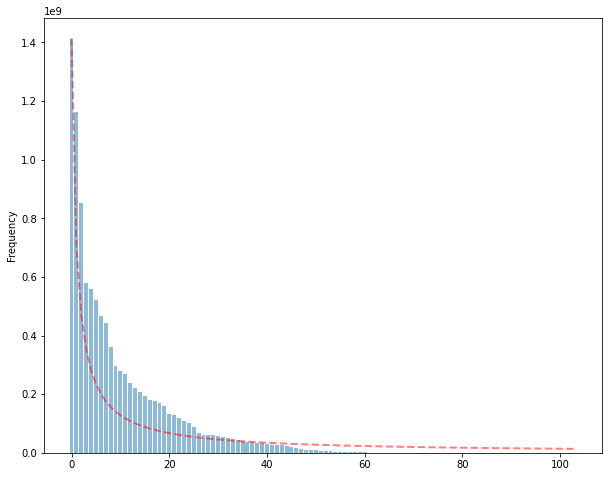

In [32]:
zipfian(np.array(list(uni_char.values())),104,'uni_char_zip')

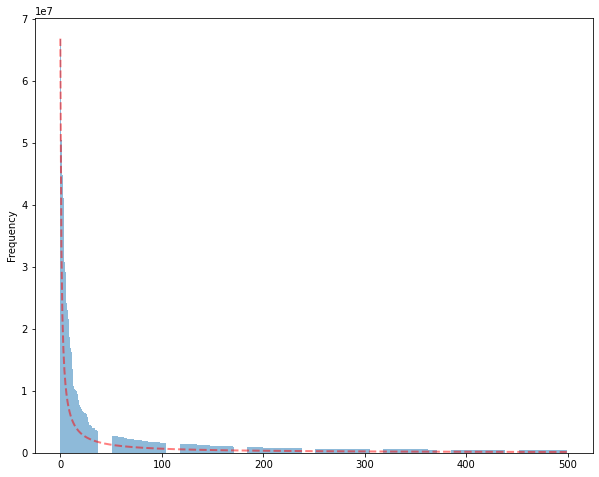

In [34]:
zipfian(np.array(list(word_dict.values())),2000,'uniword_zip')

In [36]:
zipfian(np.array(list(uni_sybl.values())),1000,'uni_sybl_zip')

NameError: name 'uni_sybl' is not defined